In [1]:
from __future__ import print_function, division

%matplotlib inline
import scipy
import pandas as pd
import numpy as np
import matplotlib
import thinkstats2
import thinkplot

In [2]:
data = pd.read_csv("basketball_players.csv", low_memory=False)
data

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN
5,baumhfr01,1946,1,CLR,NBA,45,0,0,631,0,...,0,0,0,0,0,0,0,0,0,NaN
6,beckemo01,1946,1,PIT,NBA,17,0,0,108,0,...,0,0,0,0,0,0,0,0,0,NaN
7,beckemo01,1946,2,BOS,NBA,6,0,0,13,0,...,0,0,0,0,0,0,0,0,0,NaN
8,beckemo01,1946,3,DTF,NBA,20,0,0,41,0,...,0,0,0,0,0,0,0,0,0,NaN
9,beendha01,1946,1,PRO,NBA,58,0,0,713,0,...,0,0,0,0,0,0,0,0,0,NaN


Here is the data that i'm going to analyse using the methods that we have learned 

In [3]:
print (data["dRebounds"])
print (data["assists"])

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
23721    0
23722    0
23723    0
23724    0
23725    0
23726    0
23727    0
23728    0
23729    0
23730    0
23731    0
23732    0
23733    0
23734    0
23735    0
23736    0
23737    0
23738    0
23739    0
23740    0
23741    0
23742    0
23743    0
23744    0
23745    0
23746    0
23747    0
23748    0
23749    0
23750    0
Name: dRebounds, Length: 23751, dtype: int64
0         35
1         20
2          0
3         16
4         54
5         54
6         14
7          1
8         15
9         37
10         0
11        60
12         1
13        39
14         0
15        35
16        31
17         4
18       202
19        17
20        59
21        2

Here the two columns of interest ‘dRebounds’ and ‘assists’ are being read from the csv file and consequently printed as shown above. Since, we have got pretty huge data sets if there is any relation or behavior of the data at certain regions that is related between the columns shall be examined elaborately.

In [4]:
dRebounds = data.dRebounds.dropna()
assists = data.assists.dropna()

In [5]:
dRebounds.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
assists.values

array([ 35,  20,   0, ..., 134,   3,  32], dtype=int64)

These are the numpy array of the data used for the calculatipon of the p-value.

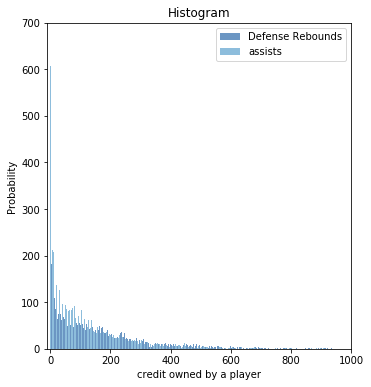

<Figure size 576x432 with 0 Axes>

In [7]:
# Histogrma
hist_dReounds = thinkstats2.Hist(dRebounds, label = "Defense Rebounds")
hist_assists = thinkstats2.Hist(assists, label = "assists")
thinkplot.preplot(2, cols=2)
width = 0.5
thinkplot.Hist(hist_dReounds, align = "right", width = 0.5)
thinkplot.Hist(hist_assists, align = "left", width = 0.5)
thinkplot.show(title='Histogram', xlabel = "credit owned by a player", ylabel = "Probability", axis = [-10,1000, 0, 700])

The histogram as a plot lets us to discover, and show, the underlying frequency distribution (shape) of the set close in magnitude two data groups’ data. This allows the inspection of the data for its underlying distribution. 

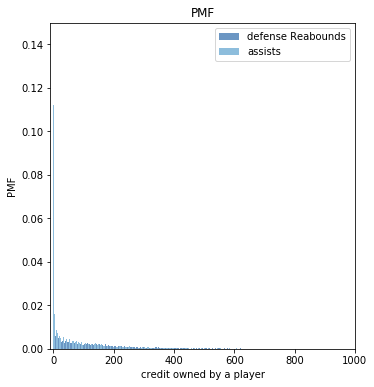

<Figure size 576x432 with 0 Axes>

In [8]:
# PMF
pmf_dRebounds = thinkstats2.Pmf(dRebounds, label = "defense Reabounds")
pmf_assists = thinkstats2.Pmf(assists, label = "assists")
thinkplot.preplot(2, cols=2)
thinkplot.Hist(pmf_dRebounds, align = "right", width= width)
thinkplot.Hist(pmf_assists, align = "left", width= width)
thinkplot.show(title='PMF', xlabel = "credit owned by a player", ylabel = "PMF", axis = [-10,1000, 0, 0.15])

The Probability Mass Function provides us with the probabilities for the discrete random variables. “Random variables” are variables from experiments or in our case from the data set.

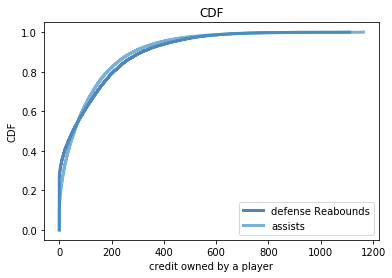

<Figure size 576x432 with 0 Axes>

In [9]:
# CDF
cdf_dRebounds = thinkstats2.Cdf(dRebounds, label = "defense Reabounds")
cdf_assists = thinkstats2.Cdf(assists, label = "assists")
thinkplot.preplot(2)
thinkplot.Cdfs([cdf_dRebounds, cdf_assists])
thinkplot.show(title='CDF', xlabel = "credit owned by a player", ylabel = "CDF")

- On the third place is the CDF plotted the same way as the others by just using the CDF module. It does give us a clearer view of the picture just by displaying thee very curvature they form .Hence, we observe how similar the data is and how at a single point the domination of the curves change but till keeps the very similar manner of propagation.
- Here their relationship is quite precise and tells a lot about the relationship between the two groups. 


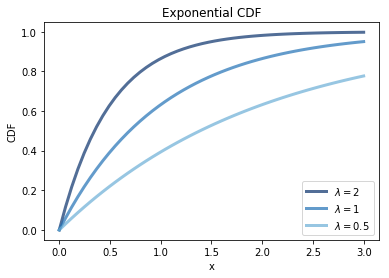

In [10]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right')

In [11]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

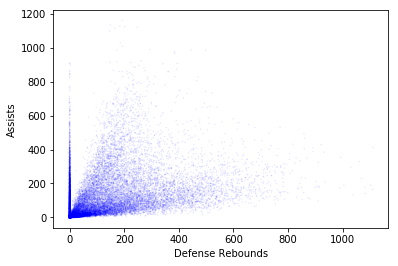

In [12]:
jet_dRebounds = Jitter(dRebounds, 1.0)
jet_assists = Jitter(assists, 1.0)

thinkplot.Scatter(jet_dRebounds, jet_assists, alpha=0.1, s=2)
thinkplot.Config(xlabel='Defense Rebounds',
                 ylabel='Assists',
                 legend=False)

As visible from the jitter plot the vast majority of the data pairs of the defense rebound and assists performance seems to be very even hence partially support the initial proposition of the hypothesis.

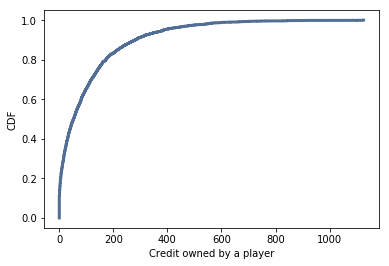

In [13]:
assists_sample = np.random.choice(assists, 5000, replace=True)
cdf_sample_as = thinkstats2.Cdf(assists_sample, label = 'Assists')
thinkplot.Cdf(cdf_sample_as, label = 'Assists')
thinkplot.Config(xlabel='Credit owned by a player', ylabel='CDF', loc = 'lower right')

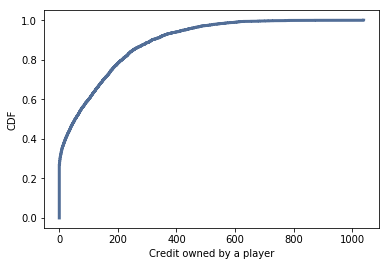

In [14]:
dRebounds_sample = np.random.choice(dRebounds, 5000, replace=True)
cdf_sample_dR = thinkstats2.Cdf(dRebounds_sample, label = 'dRebounds')
thinkplot.Cdf(cdf_sample_dR)
thinkplot.Config(xlabel='Credit owned by a player', ylabel='CDF', loc = 'lower right')

As we can see the shape of the distribution gets closest to the modelling distribution of the exponential distribution function whose λ = 2. The exponential distribution seems to be the only one to encompass the data sets from the two different columns. 

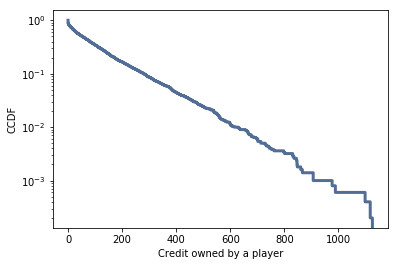

In [15]:
thinkplot.Cdf(cdf_sample_as, complement=True)
thinkplot.Config(xlabel='Credit owned by a player',
                 ylabel='CCDF', yscale='log', loc='upper right')

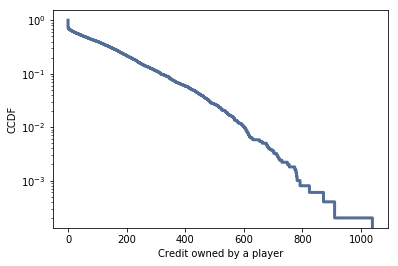

In [16]:
thinkplot.Cdf(cdf_sample_dR, complement=True)
thinkplot.Config(xlabel='Credit owned by a player',
                 ylabel='CCDF', yscale='log', loc='upper right')

These are the CCDF of the inter arrivals on a log-y scale. It is not exactly straight, which suggests that the exponential distribution is only an approximation to the real one.

In [17]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [18]:
Cov(assists, dRebounds)

7741.414195699519

- Covariance is useful for some calculations, but it doesn't mean much by itself. The coefficient of correlation is a standardized version of covariance that is easier to interpret. 
- The Covariance shows how strongly correlated two variables are. 

In [19]:
np.corrcoef(assists, dRebounds)

array([[ 1.        ,  0.38601049],
       [ 0.38601049,  1.        ]])

Pearson's correlation is not robust in the presence of outliers, and it tends to underestimate the strength of non-linear relationships. The correlation is a single number that describes the degree of relationship between two variables. 

In [20]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [21]:
Corr(assists, dRebounds)

0.38601048930879406

Here, the correlation coefficient shows that correlation is very low which means that the two groups are not very similar which in contrast don’t support the hypothesis.

In [22]:
scipy.stats.spearmanr(assists, dRebounds)

SpearmanrResult(correlation=0.543342652275423, pvalue=0.0)

- Here we are using Spearman's correlation because it is more robust unlike the Pearson correlation, and it can handle non-linear relationships as long as they are monotonic. 
- As seen from the scatterplot above the relationship between the two variables don’t look very organized so by running a Spearman's correlation the strength and direction of this monotonic relationship is measured and from that we can see the Spearmans correlation is 0.5 which is not very high and not very low but in the middle. 

In [23]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat
    
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [24]:
data = dRebounds, assists
ht = DiffMeansPermute(data)
pValue = ht.PValue()
pValue

0.0

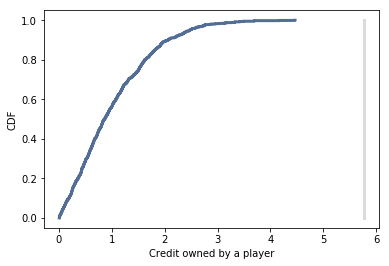

<Figure size 576x432 with 0 Axes>

In [25]:
ht.PlotCdf()
thinkplot.show(xlabel = "Credit owned by a player", ylabel = "CDF")

Here, the Test Statistic is difference with the "test_stat  =  abs(group1.mean() - group2.mean())" which the difference 
between the "group’s" mean values followed by the absolute value taken so that a positive value is obtained at the 
and because the test statistic will return a single number. The value of the p value is very small approximated to
zero which means that the p value is significant and therefore there is high confidence in discarding the null 
hypothesis and supporting the proposed hypothesis to be true. Also, from the graph its apparent that the manner 
of the  curviture is exponentially propagating and we observe how far the p value is resulting in a 0.0 value.

In [26]:
ht = DiffMeansOneSided(data)
pValue = ht.PValue()
pValue

0.0

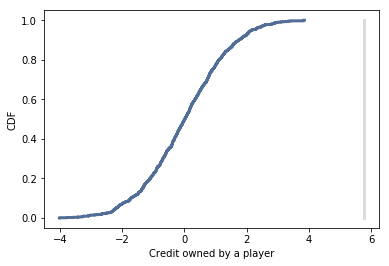

<Figure size 576x432 with 0 Axes>

In [27]:
ht.PlotCdf()
thinkplot.show(xlabel = "Credit owned by a player", ylabel = "CDF")

Here, the Test Statistic is DiffMeansOne Sided which uses test_stat = group1.mean() - group2.mean()  which takes the mean of the two column of interest dRebounds and assists and subtracts the second from the first one differing with the absence of the absolute value which model the data more as a whole because negative value may affect the final value of the test statistic. If there are great differences between the data by using this test statistic we would be able to detect it to some. The p value is in strong support of the hypothesis by pointing to the null hypothesis as wrong. Negating the null hypothesis means that the p value is statistically significant and there is indeed relationship between the two groups as stated in the hypothesis. In here, the curvature is a bit different in the base from the previous CDF however, the p value is a bit closer but not close enough to two significant figures.

In [28]:
ht = DiffStdPermute(data)
pValue = ht.PValue()
pValue

0.0

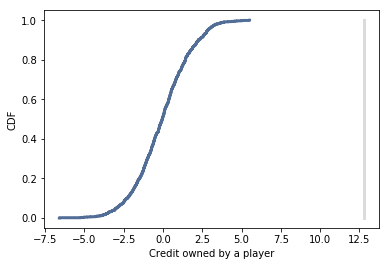

<Figure size 576x432 with 0 Axes>

In [29]:
ht.PlotCdf()
thinkplot.show(xlabel = "Credit owned by a player", ylabel = "CDF")

In the third try of this experiment another test statistic is implemented using test_stat = group1.std() -  group2.std()  which utilizes standart diviation statistic on the data groups. Standard deviation is a measure of the dispersion of a set of data from its mean. If the data points are further from the mean, there is higher deviation within the data set. Standard deviation is calculated as the square root of variance by determining the variation between each data point relative to the mean. 
As obvious from the p value the significance is confirmed once again and that is quite clear from the CDF plot as well where p value is even further confirming the preceding observations.


# Conclusion

All in all, the aim of the investigation in this report was two prove that there is a significant relation between the two sets of data provided under the naming “dRebounds” and “assists”. From the various kinds of plots an observation was conducted that concludes from the empirical evidence from the proof of the hypothesis analysis that the proposed initially hypothesis is correct. Hence we have found that a basketball player who make defense rebound have a good chance to make an assist. By using different test statistics we were able to show a very strong value for the p-value which consequently directs us to the triteness of the hypothesis. The vacuous distribution plot enabled us to observe the distribution of the two sets of data which additionally helped us imagine how the data is scattered on the plane it occupies. The strong support from all the statistical methods used leads us to conclude that the statistical significance of the observation is present both visually from the alternating kinds of plots and numerically from the statistics applied.